In [35]:
import keras
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Standard packages
from glob import glob
import random

%matplotlib inline

Using TensorFlow backend.


In [36]:
ls ../train

10004197895-flower.jpg         3682545139-daisy.jpg
1000493256-lily.jpg            36834958780-dandelion.jpg
10021434354-flower.jpg         3683660179-hydrangea.jpg
10021571776-flower.jpg         368422295-carnation.jpg
10021611363-flower.jpg         3684644573-peony.jpg
100315387-orchid.jpg           36850731-sunflower.jpg
1003518368-dandelion.jpg       36862547802-carnation.jpg
10063454706-orchid.jpg         368641328-peony.jpg
10089141125-orchid.jpg         3686460676-carnation.jpg
10089170306-orchid.jpg         3686690370-lily.jpg
10089539346-orchid.jpg         3687661212-rose.jpg
10100134086-dandelion.jpg      3687731204-lily.jpg
101137343-chrysanthemum.jpg    3687932724-flower.jpg
10115516216-rose.jpg           3687971187-lily.jpg
10115565093-rose.jpg           3689318963-peony.jpg
10115566903-rose.jpg           3690955595-lily.jpg
10118054633-rose.jpg           36913967244-chrysanthemum.jpg
1012229979-orchid.jpg          36914071004-chrysanthemum.jpg
10130969136-carnation.jpg   

In [55]:
# Load the latest best model

model_path = '../saved_models/default-model.h5'

height=256
width=256

model = keras.models.load_model(model_path)

def predict(img):

#     img = Image.open(image_path).resize((width, height))
    color_image = np.array(img)

    # bw_image is the input image converted to black and white
    bw_image = np.array(img.convert('L'))
    bw_image = bw_image.reshape((1,width,height))  

    recolored_image_array = model.predict(bw_image)

    # new_image is the output from the model
    new_image = recolored_image_array[0].astype(np.uint8)
    new_image = Image.fromarray(new_image, 'RGB')
    
    return new_image

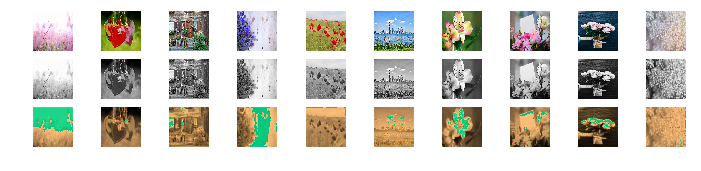

In [64]:
def process_img(img_path):
#     print(f"Reading {img_path}")
    return Image.open(img_path).resize((width, height))

image_paths = glob("../test/*.jpg")

num_images = 10
sample = random.sample(image_paths, num_images)
images = map(process_img, sample)
_, axs = plt.subplots(3, num_images, sharey=True, figsize=(12,2.5))

for i, img in enumerate(images):
#     print(img.shape)

    top_ax = axs[0][i]
    top_ax.axis('off')
    top_ax.imshow(img)
    
    mid_ax = axs[1][i]
    mid_ax.axis('off')
    mid_ax.imshow(np.array(img.convert('L')),  cmap='gray')
    
    bot_ax = axs[2][i]
    bot_ax.axis('off')
    bot_ax.imshow(predict(img))
#     axs[i]